# TP CLUSTERING

## 1- Choix du jeu de données

In [2]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import numpy as np 

### concave / bien séparé / densité similaire / non bruité

In [6]:
dataset1 = arff.loadarff(open('curve.arff','r'))[0]

### convexe / bien séparé / densité similaire / bruité

In [7]:
dataset2 = arff.loadarff(open('zelnik4.arff','r'))[0]

###  convexe / mal séparé / densité similaire / non bruité

In [8]:
dataset3 = arff.loadarff(open('engytime.arff','r'))[0]

### convexe / bien séparé / densité différente / non bruité

In [9]:
dataset4 = arff.loadarff(open('cure.arff','r'))[0]

### concave / bien séparé / densité similaire / non bruité

In [10]:
dataset5 = arff.loadarff(open('banana.arff','r'))[0]

### convexe / bien séparé / densité similaire / non bruité / 9 clusters

In [11]:
dataset6=arff.loadarff(open('diamond9.arff','r'))[0]

In [12]:
def afficher(dataset):
    lst = []
    for i in dataset:
        if i[2].decode("ascii") not in lst:
            lst.append(i[2].decode("ascii"))
    coord = []
    for j in range(len(lst)):
        coord.append([[],[]])
        for i in dataset:
            if i[2].decode("ascii") == lst[j]:
                coord[j][0].append(i[0])
                coord[j][1].append(i[1])
        plt.scatter(coord[j][0],coord[j][1])
    plt.show()


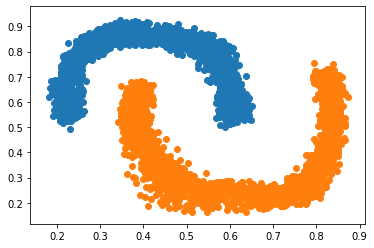

In [29]:
afficher(dataset5)

In [29]:
def affichage2(data,kmean):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .002     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmean.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmean.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


In [4]:
#formate les datasets pour les fonctions d'affichage
def formatage(dataset):
    coord = []
    for i in dataset:
        coord.append([i[0],i[1]])
    return np.asarray(coord)    


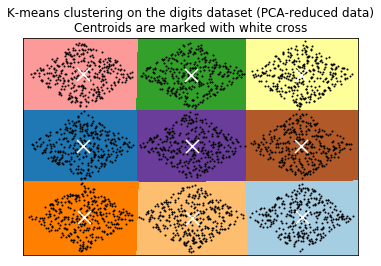

David bouldin score 0.5531625436890355
calinski_harabasz_score score 5855.152268444803


In [16]:
clt=KMeans(n_clusters=9,init='k-means++')
data = formatage(dataset6)
X = clt.fit(data)
affichage2(data,clt)
print("David bouldin score", davies_bouldin_score(formatage(dataset6),X.labels_))
print("calinski_harabasz_score score", calinski_harabasz_score(formatage(dataset6),X.labels_))

In [26]:

def determine_k_cal(data,max_k,aff_on):
    better_score = -1000
    print("---------------------")
    for i in range (2,max_k+1):
        clt =  KMeans(n_clusters=i,init='k-means++')
        X = clt.fit(data)
        score = calinski_harabasz_score(data,X.labels_)
        print("For k = "+str(i)+" score cal="+str(score))
        if (aff_on==1):
            affichage2(data,clt)
        if(better_score<score):
            better_score = score
            better_k = i
    return better_k

def determine_k_dav(data,max_k,aff_on):
    better_score = 10000000000
    print("---------------------")
    for i in range (2,max_k+1):
        clt =  KMeans(n_clusters=i,init='k-means++')
        X = clt.fit(data)
        score = davies_bouldin_score(data,X.labels_)
        print("For k = "+str(i)+" score davis ="+str(score))
        if (aff_on==1):
            affichage2(data,clt)
        if(better_score>score):
            better_score = score
            better_k = i
    return better_k


# init à random
def random_determine_k_dav(data,max_k,aff_on):
    better_score = 10000000000
    print("---------------------")
    for i in range (2,max_k+1):
        clt =  KMeans(n_clusters=i,init='random')
        X = clt.fit(data)
        score = davies_bouldin_score(data,X.labels_)
        print("For k = "+str(i)+" score davis ="+str(score))
        if (aff_on==1):
            affichage2(data,clt)
        if(better_score>score):
            better_score = score
            better_k = i
    return better_k
        
        
        


---------------------
For k = 2 score cal=1478.4955541693157
For k = 3 score cal=2133.1421383603365
For k = 4 score cal=2085.9606065900143
For k = 5 score cal=2151.8800268043015
For k = 6 score cal=2429.547255907225
For k = 7 score cal=2649.1963594480208
For k = 8 score cal=2751.958121112526
For k = 9 score cal=2811.8757364562152
For k = 10 score cal=2943.2833528124875
For k = 11 score cal=2982.850955620853
For k = 12 score cal=3050.853533513965
For k = 13 score cal=3108.2415519023975
For k = 14 score cal=3114.91397457028
For k = 15 score cal=3176.6211502399397
meilleur score calisnki 15
temps méthode Calinski 1.010319709777832
---------------------
For k = 2 score davis =0.9676574145219734


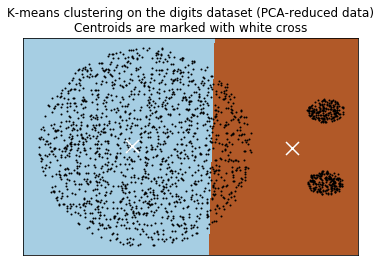

For k = 3 score davis =0.820758592323738


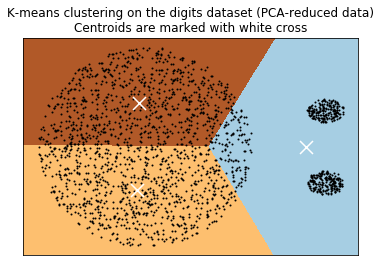

For k = 4 score davis =0.8232342112262941


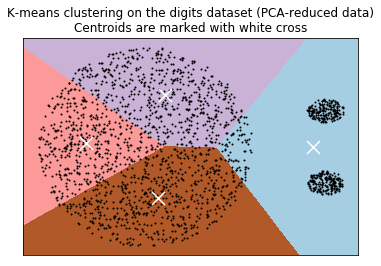

For k = 5 score davis =0.8113711664095511


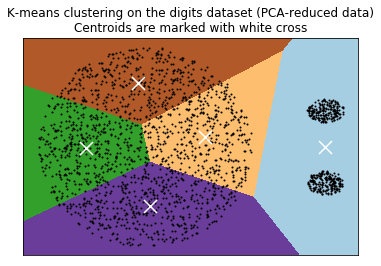

For k = 6 score davis =0.6685528575224944


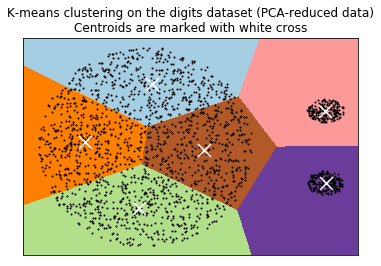

For k = 7 score davis =0.7163941674056327


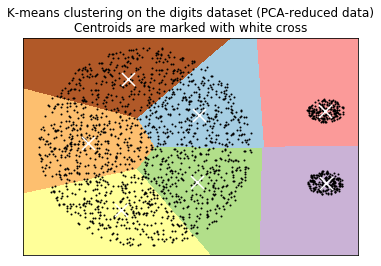

For k = 8 score davis =0.7271502233280309


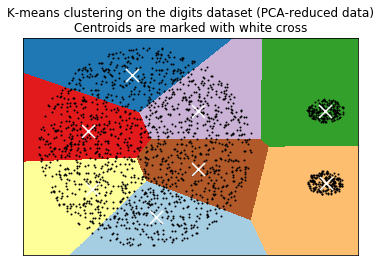

For k = 9 score davis =0.7222019246409529


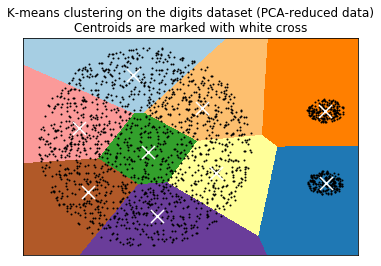

For k = 10 score davis =0.74439171719764


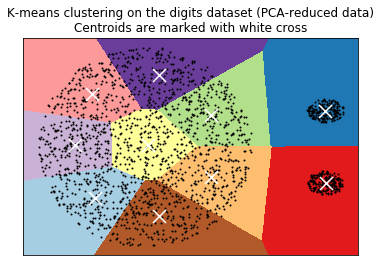

For k = 11 score davis =0.7497071650566536


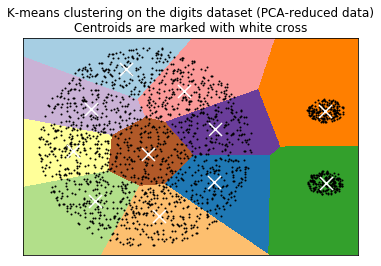

For k = 12 score davis =0.7102929491104529


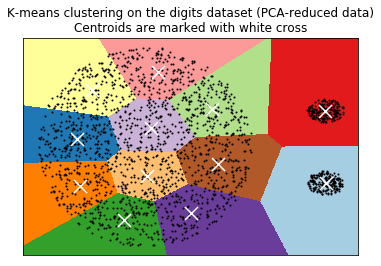

For k = 13 score davis =0.718545709539216


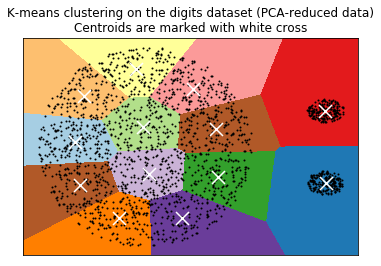

For k = 14 score davis =0.7162347865438129


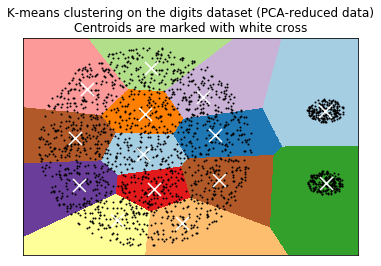

For k = 15 score davis =0.7393906085047066


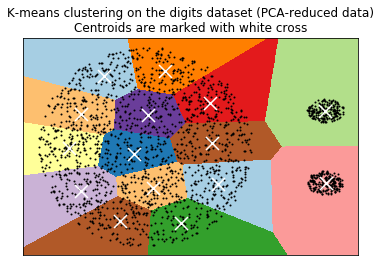

meilleur score davies 6
temps méthode davies 3.415926218032837


In [30]:
from time import time

#changer de dataset pour effectuer la méthode de détermination
#metter le 4 paramètre à 1 pour avoir l'affichage

a = time()
print("meilleur score calisnki", determine_k_cal(formatage(dataset4),15,0))
print("temps méthode Calinski", time()-a)

b = time()
print("meilleur score davies", determine_k_dav(formatage(dataset4),15,1))
print("temps méthode davies", time()-b)


In [67]:
#random 
c = time()
print("meilleur score davies", random_determine_k_dav(formatage(dataset5),15,0))
print("temps méthode ", time()-c)



---------------------
For k = 2 score davis =0.8930194573381579
For k = 3 score davis =0.851764865621602
For k = 4 score davis =0.8041444592583797
For k = 5 score davis =0.6985754561535381
For k = 6 score davis =0.6566390248055869
For k = 7 score davis =0.622129630979631
For k = 8 score davis =0.6137810974791527
For k = 9 score davis =0.6004718366529462
For k = 10 score davis =0.5936805619529735
For k = 11 score davis =0.5972752939483112
For k = 12 score davis =0.596124399115216
For k = 13 score davis =0.599563825005516
For k = 14 score davis =0.5920270440923201
For k = 15 score davis =0.6033621111195181
meilleur score davies 14
temps méthode  1.5345582962036133


## Clustering agglomératif

In [21]:
#affichage 2 ne fonctionnat plus pour les autres méthodes on utilise une nouvelle fonction
def affichage3(data,DB):
    data = data.transpose()
    plt.scatter(data[0],data[1],c=DB.labels_)
    plt.title('Agglomerative Clustering on the digits dataset')
    plt.show()


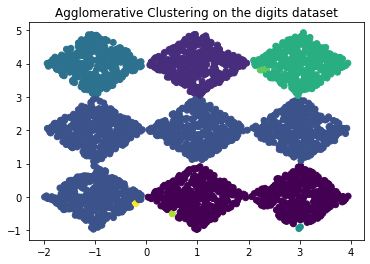

In [22]:
clt=AgglomerativeClustering(n_clusters=9,linkage="single")
data = formatage(dataset6)
X = clt.fit(data)
affichage3(data,clt)

In [18]:

def aglo_determine_k_cal(data,max_k,link,aff_on):
    better_score = -1000
    print("---------------------")
    for i in range (2,max_k+1):
        clt=AgglomerativeClustering(n_clusters=i,linkage= link)
        X = clt.fit(data)
        score = calinski_harabasz_score(data,X.labels_)
        print("For k = "+str(i)+" score cal="+str(score))
        if (aff_on==1):
            affichage3(data,clt)
        if(better_score<score):
            better_score = score
            better_k = i
    return better_k

def aglo_determine_k_dav(data,max_k,link,aff_on):
    better_score = 10000000000
    print("---------------------")
    for i in range (2,max_k+1):
        clt=AgglomerativeClustering(n_clusters=i,linkage= link)
        X = clt.fit(data)
        score = davies_bouldin_score(data,X.labels_)
        print("For k = "+str(i)+" score davis ="+str(score))
        if (aff_on==1):
            affichage3(data,clt)
        if(better_score>score):
            better_score = score
            better_k = i
    return better_k
        

In [40]:
time_av_cal = []
time_sg_cal = []
time_cp_cal = []
time_wd_cal = []

time_av_dav = []
time_sg_dav = []
time_cp_dav = []
time_wd_dav = []

## Méthode itérative de détermination de clusters

In [52]:


#changer ici le dataset
data_form = formatage(dataset6)

#si vous souhaitez

a = time()
print ("~~AVERAGE SCORE :" ,aglo_determine_k_cal(data_form,15,"average",0))
time_av_cal.append(time()-a)
print("temps :", time()-a)
a = time()
print ("~~SINGLE SCORE :" ,aglo_determine_k_cal(data_form,15,"single",0))
time_sg_cal.append(time()-a)
print("temps :", time()-a)
a = time()
print ("~~COMPLETE SCORE :" ,aglo_determine_k_cal(data_form,15,"complete",0))
time_cp_cal.append(time()-a)
print("temps :", time()-a)
a = time()
print ("~~WARD SCORE :" ,aglo_determine_k_cal(data_form,15,"ward",0))
time_wd_cal.append(time()-a)
print("temps :", time()-a)
a = time()

print ("~~AVERAGE SCORE :" ,aglo_determine_k_dav(data_form,15,"average",0))
time_av_dav.append(time()-a)
print("temps :", time()-a)
a = time()
print ("~~SINGLE SCORE :" ,aglo_determine_k_dav(data_form,15,"single",0))
time_sg_dav.append(time()-a)
print("temps :", time()-a)
a = time()
print ("~~COMPLETE SCORE :" ,aglo_determine_k_dav(data_form,15,"complete",0))
time_cp_dav.append(time()-a)
print("temps :", time()-a)
a = time()
print ("~~WARD SCORE :" ,aglo_determine_k_dav(data_form,15,"ward",0))
time_wd_dav.append(time()-a)
print("temps :", time()-a)


# dataset 1, score davis marche bien (tous les links) mais pas calinski

# dataset 2, score davis complete et ward (les otres pas trop mauvais, score calinski complete)

# dataset 3, marche pas bien, trouve au mieux 3 cluster

# dataset 4, marche bien uniquement pour single  link

# dataset 5, marche bien uniquement pour single  link

# dataset 6, marche bien sauf pour single link

---------------------
For k = 2 score cal=1647.0146453667392
For k = 3 score cal=2164.0560080773557
For k = 4 score cal=2416.8829874332614
For k = 5 score cal=2751.305368887687
For k = 6 score cal=2819.965232157161
For k = 7 score cal=3158.2616891327766
For k = 8 score cal=3909.941914431915
For k = 9 score cal=5845.389466965342
For k = 10 score cal=5451.965274385872
For k = 11 score cal=5146.388183147479
For k = 12 score cal=4913.2128951559225
For k = 13 score cal=4739.445394327004
For k = 14 score cal=4593.176479138529
For k = 15 score cal=4486.68838392364
~~AVERAGE SCORE : 9
temps : 1.2503364086151123
---------------------
For k = 2 score cal=4.423177061399489
For k = 3 score cal=322.10151166464766
For k = 4 score cal=215.10911682882843
For k = 5 score cal=421.55145067145963
For k = 6 score cal=668.6409884615106
For k = 7 score cal=557.233539264062
For k = 8 score cal=722.2479597781876
For k = 9 score cal=632.2965059889084
For k = 10 score cal=566.1093581316734
For k = 11 score cal=1

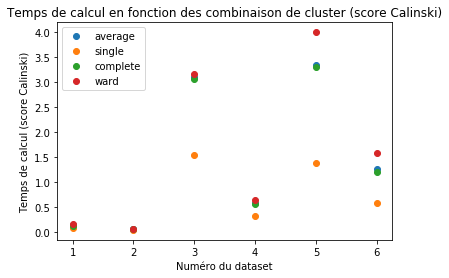

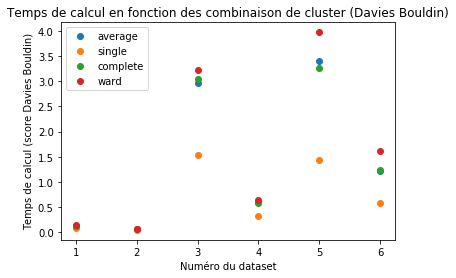

In [62]:
label_dataset = [1,2,3,4,5,6]
plt.plot(label_dataset, time_av_cal, "o", label="average")
plt.plot(label_dataset, time_sg_cal, "o", label="single")
plt.plot(label_dataset, time_cp_cal, "o", label="complete")
plt.plot(label_dataset, time_wd_cal, "o", label="ward")
plt.xlabel("Numéro du dataset")
plt.ylabel("Temps de calcul (score Calinski)")
plt.title("Temps de calcul en fonction des combinaison de cluster (score Calinski)")
plt.legend()
plt.show()

plt.plot(label_dataset, time_av_dav, "o", label="average")
plt.plot(label_dataset, time_sg_dav, "o", label="single")
plt.plot(label_dataset, time_cp_dav, "o", label="complete")
plt.plot(label_dataset, time_wd_dav, "o", label="ward")
plt.xlabel("Numéro du dataset")
plt.ylabel("Temps de calcul (score Davies Bouldin)")
plt.title("Temps de calcul en fonction des combinaison de cluster (Davies Bouldin)")
plt.legend()
plt.show()





